In [107]:
import sys, importlib
importlib.reload(sys.modules['utils'])

# imports
from utils import *

# Load dataset

In [104]:
# Load data
dataset_path = "data/postgis_output/"
dataset = load_and_preprocess_multiple_csv_from_path(dataset_path,\
                                                    preprocess_function=preprocess_complete_dataset,\
                                                     only_first_n=10, dtype={'edifc_uso': object})

In [105]:
# Show the dataset
print("Dataset Shape: ", dataset.shape)
dataset.iloc[:5, :]

Dataset Shape:  (1404, 14)


,footprint_id,edifc_uso,max_in_footprint,percentile_20_in_footprint,percentile_40_in_footprint,percentile_60_in_footprint,percentile_80_in_footprint,min_overrall,building_height,roof_height,footprint_area,points,footprint_geometry,edifc_uso_desc
0,2254.0,01,150.41,149.400,149.628,149.90,150.146,145.76,4.65,0.782,78.726851,"[[9.22405609, 45.41016555, 149.69], [9.2240402...",MULTIPOLYGON (((9.22411483996214 45.4101484061...,residenziale
4,17121.0,01,150.93,149.998,150.140,150.29,150.508,146.11,4.82,0.790,74.005163,"[[9.22387994, 45.41044475, 149.66], [9.2238859...",MULTIPOLYGON (((9.223920647880583 45.410472087...,residenziale
9,34791.0,01,155.01,153.570,153.910,154.25,154.590,145.80,9.21,1.100,300.531083,"[[9.22408436, 45.41055966, 146.51], [9.2242738...",MULTIPOLYGON (((9.224319166252346 45.410259232...,residenziale
11,64467.0,01,158.38,153.810,154.070,154.34,154.668,146.03,12.35,4.310,234.685697,"[[9.22401477, 45.4103489, 154.65], [9.22410717...",MULTIPOLYGON (((9.224086181778397 45.410338011...,residenziale
12,74447.0,01,154.53,149.610,152.360,152.53,152.710,145.80,8.73,2.170,167.277890,"[[9.2243471, 45.41020449, 145.82], [9.22423938...",MULTIPOLYGON (((9.224319166252346 45.410259232...,residenziale


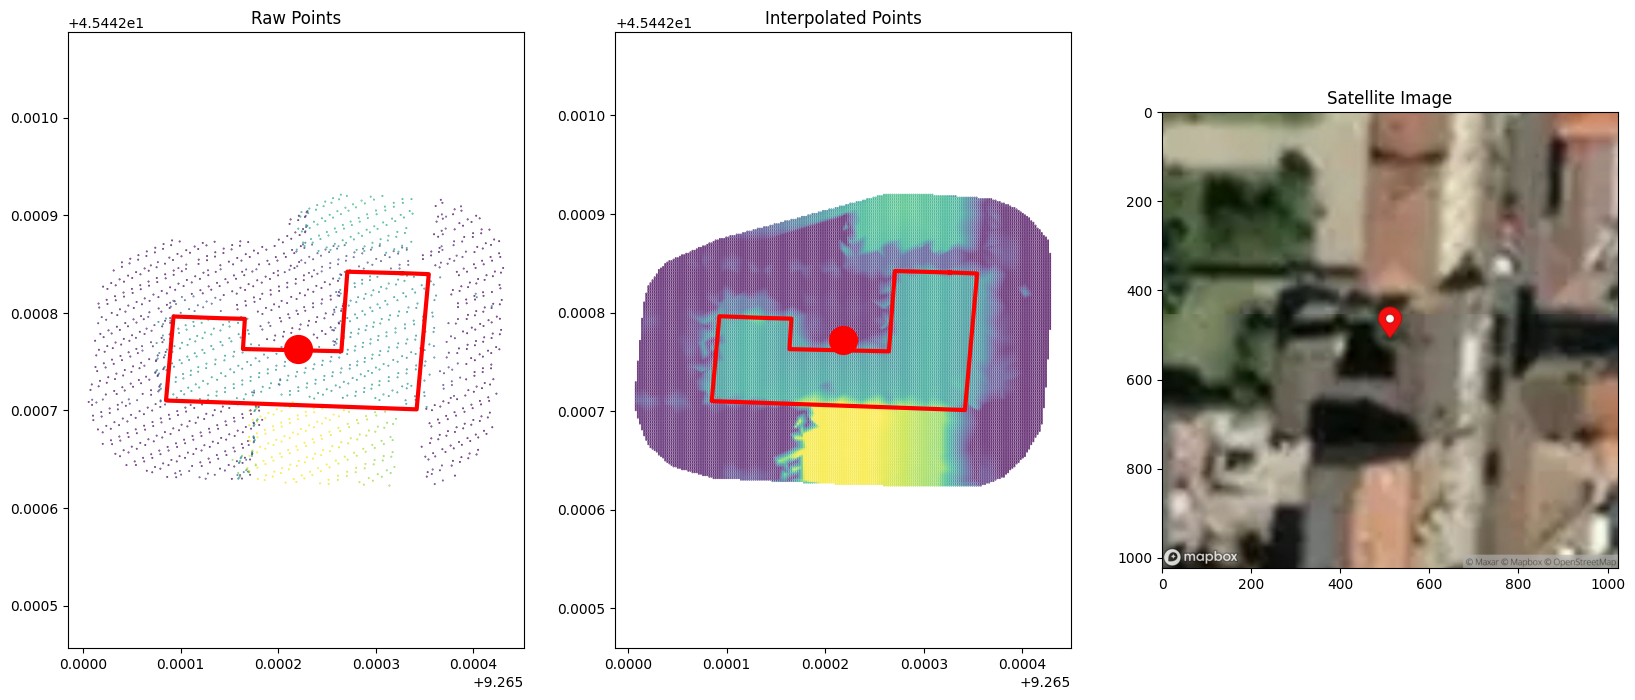

In [221]:
# Show data example
show_data_example(dataset, example_n=50)

# Rebalance Dataset

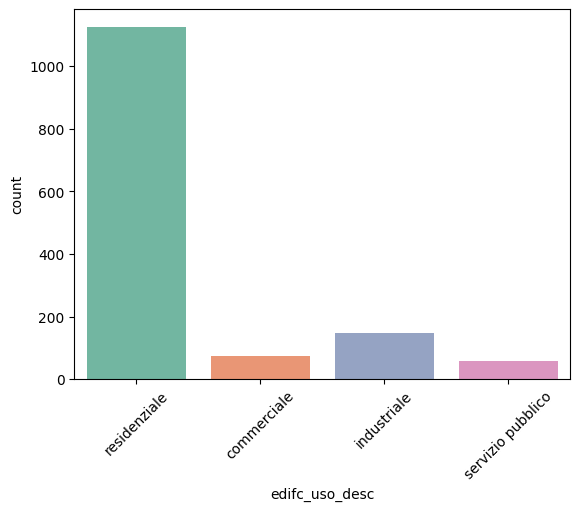

In [110]:
# Check if dataset is balanced
show_dataset_balance(dataset, "edifc_uso_desc")

In [111]:
balanced_dataset = balance_dataset(dataset, "edifc_uso_desc")

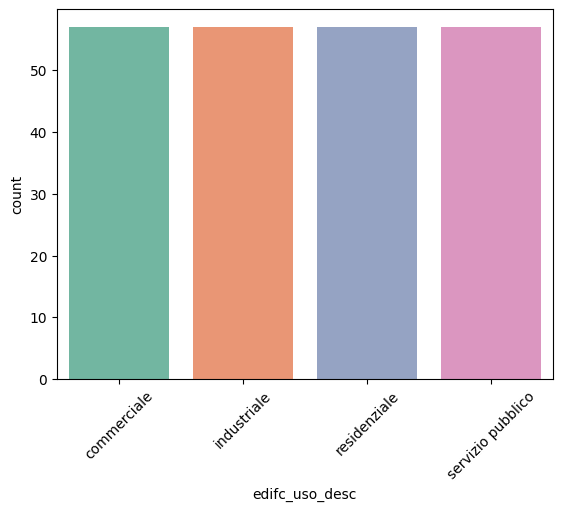

In [112]:
show_dataset_balance(balanced_dataset, "edifc_uso_desc")

# Features approach

In [156]:
import sys, importlib
importlib.reload(sys.modules['utils'])

# imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from utils import *

In [113]:
# Load data
dataset_path = "data/postgis_output/"
feature_dataset = load_and_preprocess_multiple_csv_from_path(dataset_path, \
                                                            preprocess_function=preprocess_features_dataset,\
                                                            dtype={'edifc_uso': object})
feature_balanced_dataset = balance_dataset(feature_dataset, "edifc_uso_desc")

File named D45510918_0101_Punti.csv not loaded properly!


In [53]:
#TODO implement a "read_dataset_w_cache" function

#feature_dataset.to_csv('data/cache/cached_features_dataset.pkl', index=False)
#feature_balanced_dataset.to_csv('data/cache/cached_features_balanced_dataset.pkl', index=False)

#feature_dataset = pd.read_csv('data/cache/cached_features_dataset.pkl')
#feature_balanced_dataset = pd.read_csv('data/cache/cached_features_balanced_dataset.pkl')

In [114]:
feature_balanced_dataset.describe()

,footprint_id,max_in_footprint,percentile_20_in_footprint,percentile_40_in_footprint,percentile_60_in_footprint,percentile_80_in_footprint,min_overrall,building_height,roof_height,footprint_area
count,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000
mean,37448.118661,181.711984,173.156603,174.521226,175.631322,176.738402,162.503488,19.208496,7.190758,902.754409
std,21831.977001,13.577540,11.443327,11.739878,11.978229,12.169357,9.991168,11.415422,7.038620,1814.475080
min,1.000000,146.300000,142.590000,142.764000,144.300000,144.570000,139.560000,0.100000,0.000000,0.164933
25%,18628.000000,172.040000,163.499500,164.530000,165.775000,167.045000,154.600000,10.640000,2.320000,174.037873
50%,37051.500000,182.340000,173.775000,175.361000,176.468000,177.605000,160.630000,17.245000,5.658000,420.195076
75%,56321.250000,190.260000,181.383000,182.860000,183.991000,185.072500,170.132500,25.962500,9.560000,974.201336
max,75271.000000,294.740000,238.330000,239.550000,245.940000,247.050000,190.610000,134.910000,111.620000,74956.983976


In [195]:
# Prepare data for ML
feature_cols = ['max_in_footprint', 'percentile_20_in_footprint', 'percentile_40_in_footprint', \
              'percentile_60_in_footprint', 'percentile_80_in_footprint', 'min_overrall', \
              'building_height', 'roof_height', 'footprint_area']
              
X = feature_balanced_dataset[feature_cols].values
y, labels_encoder = multiclass_label_encoder(feature_balanced_dataset["edifc_uso_desc"].values)

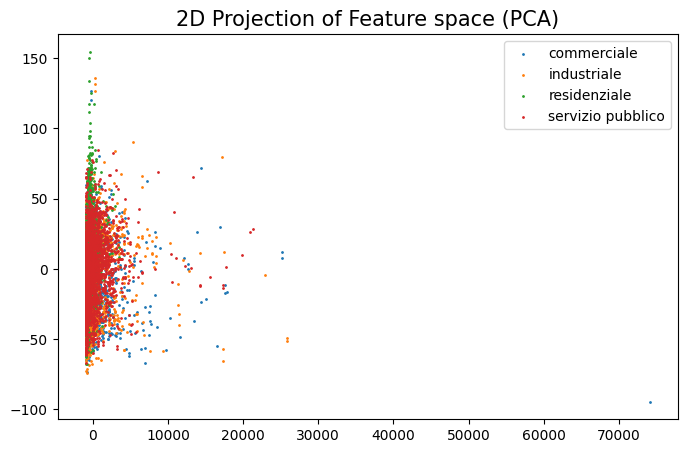

In [186]:
plot_vectors(X, y, labels_encoder, title="2D Projection of Feature space (PCA)", figsize=(8, 5))

In [118]:
# The flag stratify creates a split with the same proportion of classes in the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Ravel the labels to avoid warnings w/ following ML models
y_train, y_test = y_train.ravel(), y_test.ravel()

# Scale the features due to tested improvements in the performance
standard_scaler = preprocessing.StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

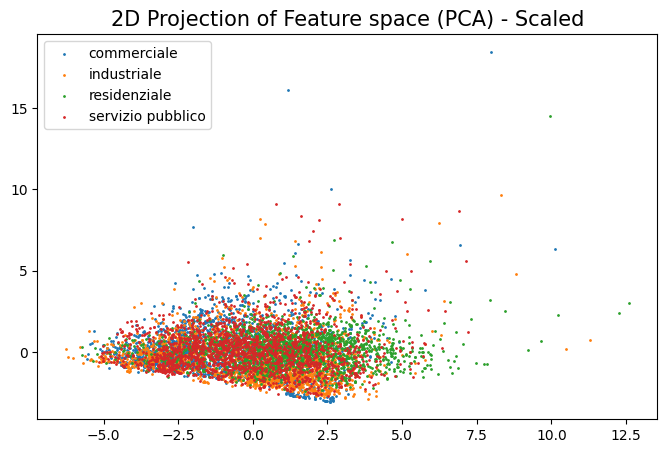

In [187]:
plot_vectors(X_train_standard, y_train, labels_encoder, title="2D Projection of Feature space (PCA) - Scaled", figsize=(8, 5))

## Knn

In [209]:
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, validation_curve
from mlxtend.plotting import plot_decision_regions

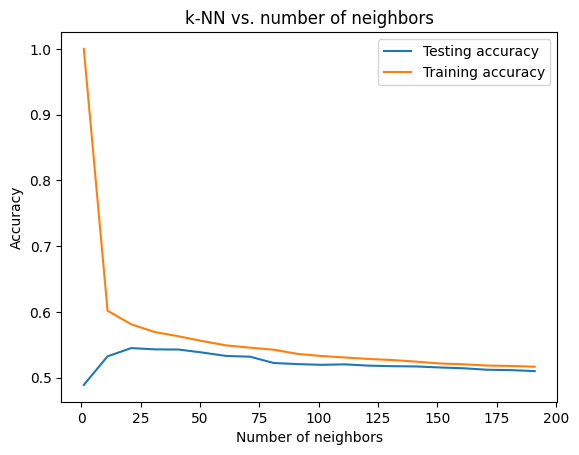

In [188]:
neighbors = range(1,200,10)
knn_train_score, knn_val_score = validation_curve(kNN(), X_train_standard, y_train.ravel(), param_name='n_neighbors', param_range=neighbors, cv=5)

plt.title('k-NN vs. number of neighbors')
plt.plot(neighbors, np.mean(knn_val_score, 1), label='Testing accuracy')
plt.plot(neighbors, np.mean(knn_train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [210]:
k_grid = {'n_neighbors': range(1, 75, 3)}
knn_learner = GridSearchCV(estimator=kNN(), param_grid=k_grid, cv=5, return_train_score=True)
knn_learner.fit(X_train_standard, y_train)
knn_learner.best_params_, knn_learner.best_score_

({'n_neighbors': 28}, 0.5471966604841679)

In [211]:
knn_model = knn_learner.best_estimator_
knn_cv_scores = cross_val_score(knn_model, X_train_standard, y_train, cv=5)
print("Cross-Validation Score for best KNN model: ", knn_cv_scores.mean())

Cross-Validation Score for best KNN model:  0.5471966604841679


In [212]:
# TODO remove?

# In the following example, we:

# Run 5-fold cross-validation on the entire dataset
# On the training part of each fold, run internal 5-fold cross-validation to find the best value of the parameter
# Re-train the model on the training part of the outer fold using the optimized parameter
# Test the model on the testing part of the outer fold.

#k_grid = {'n_neighbors': range(1,75,3)}
#learner = GridSearchCV(estimator=kNN(), param_grid=k_grid, cv=5) # internal C-V
#scores = cross_val_score(learner, X_train_standard, y_train.ravel(), cv=5) # external C-V
#scores, scores.mean()

In [215]:
y_pred_knn = knn_model.predict(X_test_standard)

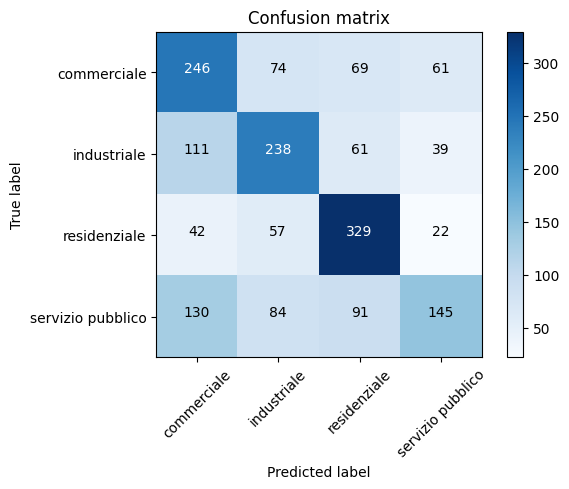

In [216]:
# Compute and plot the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_knn) 
plot_confusion_matrix(confusion_mtx, labels_encoder, title='Confusion matrix - KNN') 

/Users/billy/Documents/university/dse/statistical_methods_for_machine_learning/MSA/.venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0, 0.5, 'mean_texture')

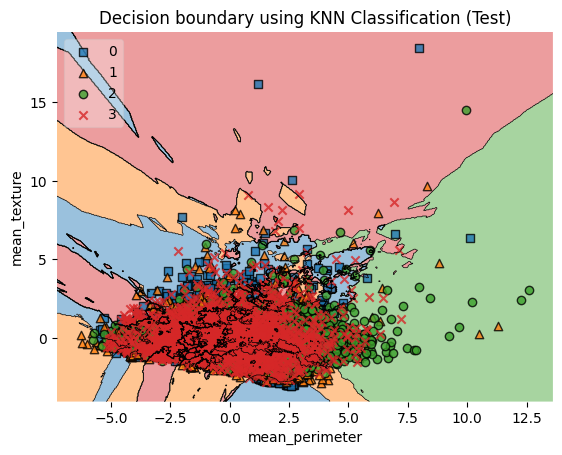

In [217]:
pca = decomposition.PCA(n_components=2)
X_train_standard_pca = pca.fit_transform(X_train_standard)
knn_model.fit(X_train_standard_pca, y_train.ravel())
plot_decision_regions(X_train_standard_pca, y_train.astype(int), clf = knn_model, legend = 2)
plt.title("Decision boundary using KNN Classification (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture")

## Decision Tree

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

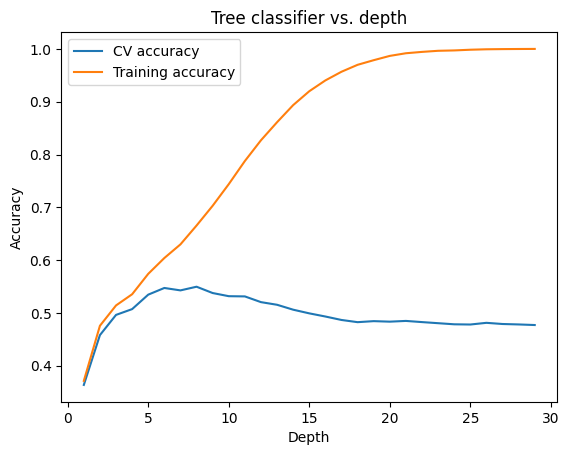

In [235]:
depths = np.arange(1,30,1)
learner = DecisionTreeClassifier()
train_score, val_score = validation_curve(learner, X_train_standard, y_train, param_name='max_depth', param_range=depths, cv=3)

plt.title('Tree classifier vs. depth')
plt.plot(depths, np.mean(val_score, 1), label='CV accuracy')
plt.plot(depths, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [236]:
k_grid = {'max_depth': range(1, 30, 1)}
tree_learner = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=k_grid, cv=3, return_train_score=True)
tree_learner.fit(X_train_standard, y_train)
tree_learner.best_params_, tree_learner.best_score_

({'max_depth': 8}, 0.5509526260063056)

In [247]:
tree_model = tree_learner.best_estimator_
tree_cv_scores = cross_val_score(tree_model, X_train_standard, y_train, cv=5)
print("Cross-Validation Score for best Tree model: ", tree_cv_scores.mean())

Cross-Validation Score for best Tree model:  0.5522036145870887


In [238]:
y_pred_tree = tree_model.predict(X_test_standard)

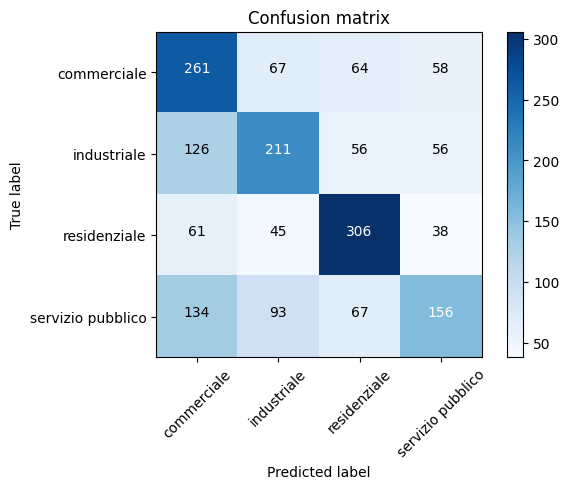

In [239]:
# Compute and plot the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_tree) 
plot_confusion_matrix(confusion_mtx, labels_encoder, title='Confusion matrix - Decision Tree')

In [ ]:
# Cannot represent tree decision boundary on 9 dimensions

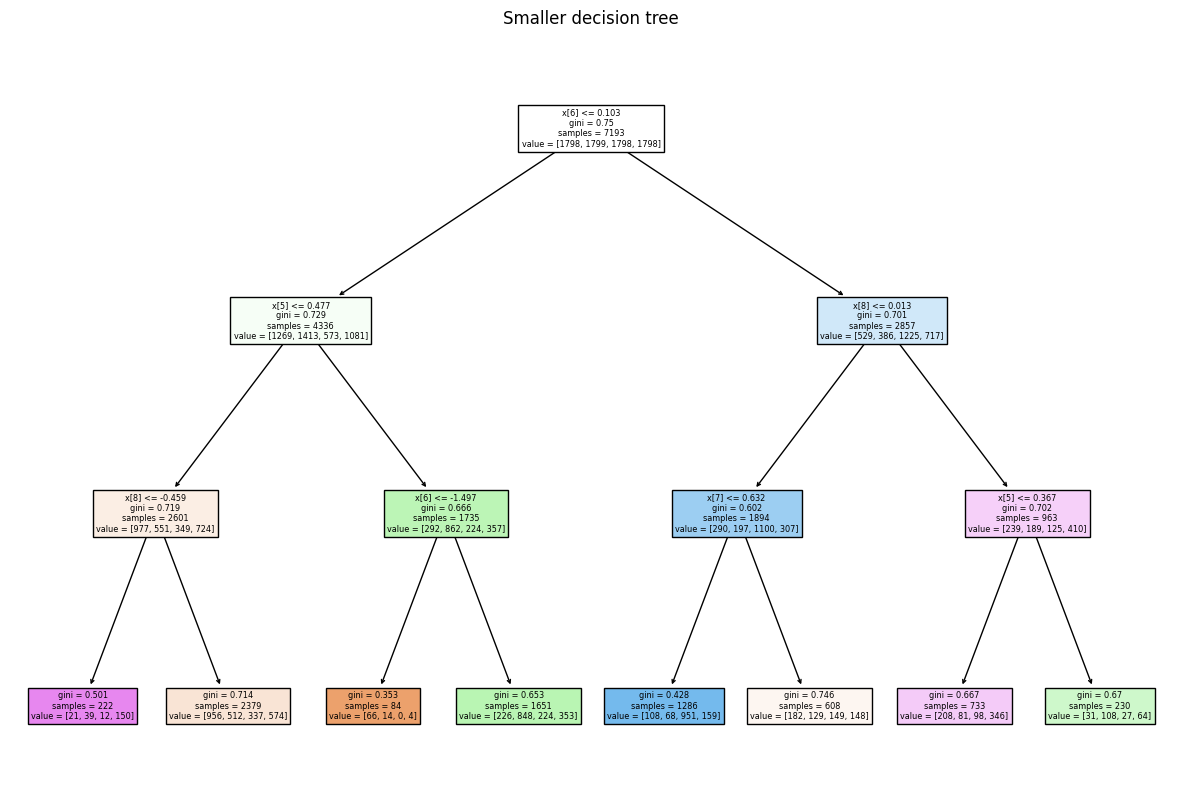

In [256]:
# Tree is too big to represent properly, we just represent a smaller tree
# Should we give some interpretation?

from sklearn.tree import plot_tree

# Create and train model
clf = DecisionTreeClassifier(max_depth=3)  # set hyperparameter
clf.fit(X_train_standard, y_train)

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True)
plt.title("Smaller decision tree")
plt.show()

### Bagging

In [257]:
from sklearn.ensemble import BaggingClassifier

In [259]:
tree_lrn = DecisionTreeClassifier()
bag_lrn = BaggingClassifier(estimator=tree_lrn, n_estimators=10)
sizes = range(100, 4500, 200)
train_size, train_score, val_score = learning_curve(bag_lrn, X_train_standard, y_train, train_sizes=sizes, cv=3)

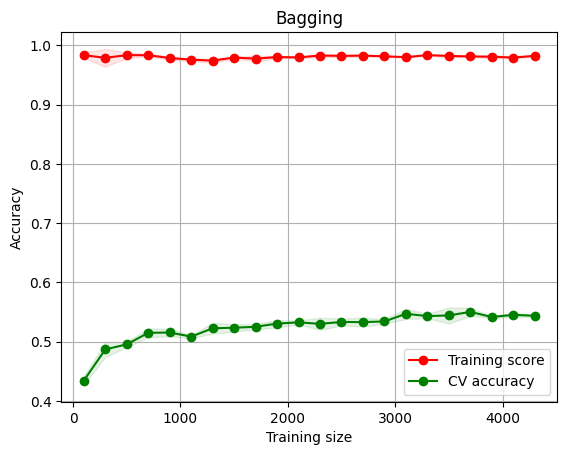

In [260]:
plt.title('Bagging')
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)
plt.grid()
plt.fill_between(train_size, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(train_size, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")
plt.plot(train_size, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_size, val_score_mean, 'o-', color="g",
         label="CV accuracy")
plt.legend()
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

In [261]:
list(np.round(np.mean(val_score, 1), decimals=2))

[0.43,
 0.49,
 0.5,
 0.51,
 0.52,
 0.51,
 0.52,
 0.52,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.55,
 0.54,
 0.54,
 0.55,
 0.54,
 0.55,
 0.54]

### Random Forest

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [267]:
num_trees = [1,10,100, 200, 300, 400, 500, 1000]
tree_lrn = DecisionTreeClassifier()
bag_lrn = BaggingClassifier(estimator=tree_lrn)
rf_lrn = RandomForestClassifier(max_depth=15)
train_score, bag_val_score = validation_curve(bag_lrn, X_train_standard, y_train, 
                                              param_name='n_estimators',
                                              param_range=num_trees,
                                              cv=3)
train_score, rf_val_score = validation_curve(rf_lrn, X_train_standard, y_train,
                                             param_name='n_estimators',
                                             param_range=num_trees,
                                             cv=3)

KeyboardInterrupt: 

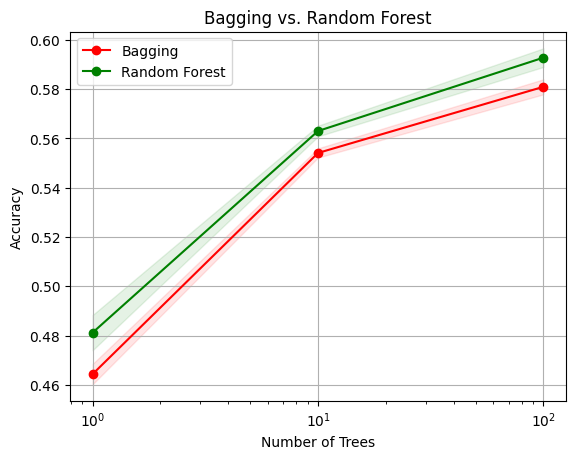

In [ ]:
plt.title('Bagging vs. Random Forest')
bag_val_score_mean = np.mean(bag_val_score, axis=1)
bag_val_score_std = np.std(bag_val_score, axis=1)
rf_val_score_mean = np.mean(rf_val_score, axis=1)
rf_val_score_std = np.std(rf_val_score, axis=1)
plt.grid()
plt.xscale("log")
plt.fill_between(num_trees, bag_val_score_mean - bag_val_score_std,
                 bag_val_score_mean + bag_val_score_std, alpha=0.1,
                 color="r")
plt.fill_between(num_trees, rf_val_score_mean - rf_val_score_std,
                 rf_val_score_mean + rf_val_score_std, alpha=0.1, color="g")
plt.plot(num_trees, bag_val_score_mean, 'o-', color="r",
         label="Bagging")
plt.plot(num_trees, rf_val_score_mean, 'o-', color="g",
         label="Random Forest")
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

# CNN Approach

In [108]:
import pandas as pd
df = pd.read_csv("data/cache/cached_cnn.csv")

In [109]:
df

,footprint_id,edifc_uso,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,10000,10001
0,162.0,1002,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
1,1920.0,8,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
2,2736.0,1002,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
3,4501.0,1002,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
4,5047.0,1002,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4125,69488.0,1,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
4126,70001.0,95,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
4127,71430.0,1,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11
4128,72153.0,1,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,...,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11,152.11


# Results and Comparison